In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal 

In [2]:
def get_epsilon(sigma, delta=1):
    norm = multivariate_normal(None, sigma)
    while True:
        yield delta * norm.rvs()

In [3]:
class Model:
    def __init__(self, d, init_u=None, init_v=None, scale=1) -> None:
        if init_u is None:
            self.u = scale * np.random.randn(d)
        else:
            self.u = init_u
        if init_v is None:
            self.v = scale * np.random.randn(d)
        else:
            self.v = init_v
        self.u_history = [self.u.copy()]
        self.v_history = [self.v.copy()]
    
    def step(self, step_size, epsilon):
        self.u += step_size * (1 - np.dot(self.u_history[-1], self.v_history[-1]) + epsilon) * self.v_history[-1]
        self.v += step_size * (1 - np.dot(self.u_history[-1], self.v_history[-1]) + epsilon) * self.u_history[-1]
        self.u_history.append(self.u.copy())
        self.v_history.append(self.v.copy())
        return (self.u == 0).mean(), (self.v == 0).mean()
    
    def plot_loss(self, x_log=False, y_log=False):
        l = []
        for i in range(len(self.u_history)):
            l.append((1 - np.dot(self.u_history[i], self.v_history[i])) ** 2)
        plt.plot(l)
        if x_log:
            plt.xscale('log')
        if y_log:
            plt.yscale('log')
        plt.title('(1 - <u, v>) ^ 2')

    def plot_spars(self, x_log=False, y_log=False):
        u_spars = [np.isclose(u, 0, rtol=1e-05, atol=1e-06).mean() for u in self.u_history]
        v_spars = [np.isclose(v, 0, rtol=1e-05, atol=1e-06).mean() for v in self.v_history]
        plt.plot(u_spars, label='u sparsity')
        plt.plot(v_spars, label='v sparsity')
        if x_log:
            plt.xscale('log')
        if y_log:
            plt.yscale('log')
        plt.title('Sparsity')
        plt.legend()

    def plot_l2_distance(self, x_log=False, y_log=False):
        l = []
        for i in range(len(self.u_history)):
            l.append(np.square((self.u_history[i]-self.v_history[i])).sum())
        plt.plot(l)
        if x_log:
            plt.xscale('log')
        if y_log:
            plt.yscale('log')
        plt.title('l2 distance between u and v')
        

In [4]:
step_size = 1e-2
d = 10
delta = 2
sigma = np.eye(d)
epsilons = get_epsilon(sigma, delta)

In [5]:
next(epsilons)

array([-0.2067514 , -0.73901326, -1.92105735, -3.86062199, -2.12070123,
        1.03801266,  1.88846694, -1.91806164,  2.17508372, -2.27062317])

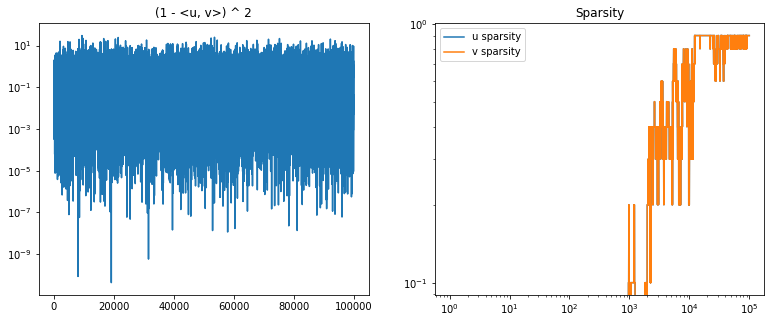

In [6]:
m = Model(d, scale = .1)
step_size = 1e-1

it  = int(1e5)
for t in range(it):
    m.step(step_size, next(epsilons))

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
m.plot_loss(x_log=False, y_log=True)
plt.subplot(1, 2, 2)
m.plot_spars(x_log=True, y_log=True)

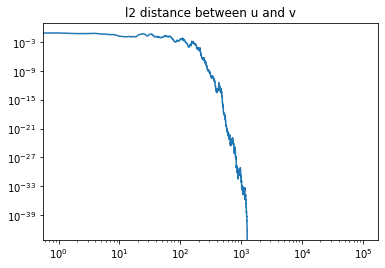

In [7]:
m.plot_l2_distance(x_log=True, y_log=True)

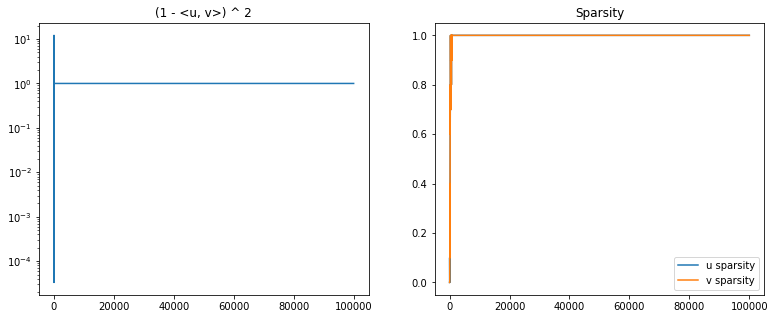

In [8]:
step_size = 1e-1
delta = 5
sigma = np.eye(d)
epsilons = get_epsilon(sigma, delta)
m = Model(d, scale=0.1)

for t in range(it):
    m.step(step_size, next(epsilons))

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
m.plot_loss(x_log=False, y_log=True)
plt.subplot(1, 2, 2)
m.plot_spars()

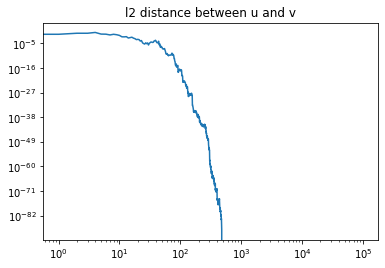

In [9]:
m.plot_l2_distance(x_log=True, y_log=True)